# EDA and Plots

First we load the needed libraries and the data 

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sa = pd.read_csv(r"..\Data\SAdata\SA_revised.csv")
uk = pd.read_csv("../Data/Londondata/revised.csv")

We add a column for the country of origin. For South Africa we also convert the readings from Amps to kWh

In [4]:
sa["Country"] = "South Africa"
sa["Unitsread"] = (sa["Unitsread"]*220)/1000
uk["Country"] = "United Kingdom"

In [5]:
sa.head()

,Unnamed: 0,RecorderID,ProfileID,Datefield,Unitsread,Valid,Country
0,0,BTW001,12019685,2013-01-01 00:00:00,0.176,1.0,South Africa
1,1,BTW001,12019685,2013-01-01 01:00:00,0.176,1.0,South Africa
2,2,BTW001,12019685,2013-01-01 02:00:00,0.176,1.0,South Africa
3,3,BTW001,12019685,2013-01-01 03:00:00,0.176,1.0,South Africa
4,4,BTW001,12019685,2013-01-01 04:00:00,0.176,1.0,South Africa


In [6]:
uk.head()

,DateTime,Acorn,Acorn_grouped,KWH/hh (per half hour),LCLid,stdorToU,year,Country
0,2013-01-01 00:00:00,ACORN-A,Affluent,0.460,MAC000002,Std,2013,United Kingdom
1,2013-01-01 01:00:00,ACORN-A,Affluent,0.426,MAC000002,Std,2013,United Kingdom
2,2013-01-01 02:00:00,ACORN-A,Affluent,0.411,MAC000002,Std,2013,United Kingdom
3,2013-01-01 03:00:00,ACORN-A,Affluent,0.395,MAC000002,Std,2013,United Kingdom
4,2013-01-01 04:00:00,ACORN-A,Affluent,0.221,MAC000002,Std,2013,United Kingdom


We reformat the two datasets for them to correspond, and we drop the nan values

In [7]:
sa_plot = sa.drop(sa.columns[[0,1,5]], axis=1)

sa_plot.rename(columns = {'Unitsread':'KWh', 'Country':'Countries', 'Datefield':'DateTime'}, inplace = True)

uk_plot = uk.drop(uk.columns[[1,2,5,6]], axis = 1)

uk_plot.rename(columns = {"KWH/hh (per half hour) ":'KWh', 'Country':'Countries'}, inplace = True) 

uk_plot.head()
sa_plot.head()
len(uk_plot)




1261440

In [8]:
uk_plot = uk_plot.dropna()
sa_plot = sa_plot.dropna()

uk_plot.head()

len(sa_plot[sa_plot["KWh"] == 0 ])/len(sa_plot)

0.12474433567536608

### Distribution

We first plot the distribution of hourly readings for the two countries

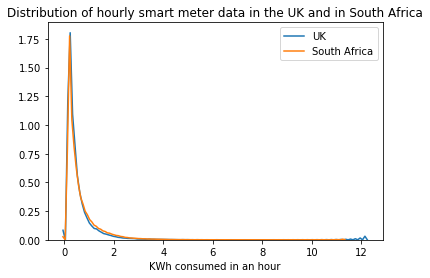

In [200]:
sns.distplot(uk_plot.iloc[:,1],hist = False, norm_hist = False, label = "UK")
sns.distplot(sa_plot.iloc[:,2], hist = False, norm_hist = False, label = "South Africa")
plt.title("Distribution of hourly smart meter data in the UK and in South Africa")
plt.xlabel("KWh consumed in an hour")
plt.savefig("Plots/Distributions.png")
plt.show()


We then zoomon the 0 to 2 kWh zone

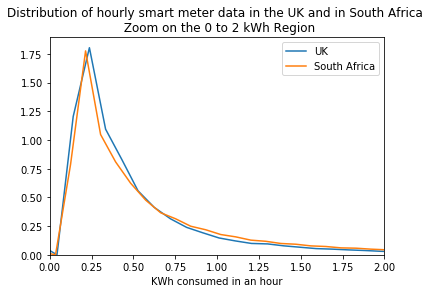

In [201]:
sns.distplot(uk_plot.iloc[:,1],hist = False, norm_hist = False, label = "UK")
sns.distplot(sa_plot.iloc[:,2], hist = False, norm_hist = False, label = "South Africa")
plt.xlim(0,2)
plt.title("Distribution of hourly smart meter data in the UK and in South Africa \n Zoom on the 0 to 2 kWh Region")
plt.xlabel("KWh consumed in an hour")
plt.savefig("Plots/Distributions_0_to_2.png")
plt.show()

We convert the hourly data to daily data to see the daily distribution

In [9]:
uk_plot1 = uk_plot
uk_plot1.index= pd.DatetimeIndex(uk_plot["DateTime"])
uk_plot1 = uk_plot1.drop(["DateTime"], axis = 1)
uk_plot1.head()


,KWh,LCLid,Countries
DateTime,,,
2013-01-01 00:00:00,0.460,MAC000002,United Kingdom
2013-01-01 01:00:00,0.426,MAC000002,United Kingdom
2013-01-01 02:00:00,0.411,MAC000002,United Kingdom
2013-01-01 03:00:00,0.395,MAC000002,United Kingdom
2013-01-01 04:00:00,0.221,MAC000002,United Kingdom


In [10]:
sa_plot1 = sa_plot
sa_plot1.index= pd.DatetimeIndex(sa_plot["DateTime"])
sa_plot1 = sa_plot1.drop(["DateTime"], axis = 1)
sa_plot1.head()

,ProfileID,KWh,Countries
DateTime,,,
2013-01-01 00:00:00,12019685,0.176,South Africa
2013-01-01 01:00:00,12019685,0.176,South Africa
2013-01-01 02:00:00,12019685,0.176,South Africa
2013-01-01 03:00:00,12019685,0.176,South Africa
2013-01-01 04:00:00,12019685,0.176,South Africa


In [11]:
groups = uk_plot1.groupby("LCLid").apply(lambda x: len(x))
ind = groups.index

uk_day = uk_plot1[uk_plot1["LCLid"] == ind[0]]
uk_days = uk_day.resample('D').apply(lambda x: x.values.sum())
uk_days["LCLid"] = uk_day["LCLid"]
uk_days["Countries"] = uk_day["Countries"]



for i in range(1, len(ind)):
    uk_day1 = uk_plot1[uk_plot1["LCLid"] == ind[i]]
    uk_days1 = uk_day1.resample('D').apply(lambda x: x.values.sum())
    uk_days1["LCLid"] = uk_day1["LCLid"]
    uk_days1["Countries"] = uk_day1["Countries"]
    
    uk_days = uk_days.append(uk_days1)
    
uk_days = uk_days.sort_values(['LCLid','DateTime'])

In [12]:
groups = sa_plot1.groupby("ProfileID").apply(lambda x: len(x))
ind = groups.index

sa_day = sa_plot1[sa_plot1["ProfileID"] == ind[0]]
sa_days = sa_day.resample('D').apply(lambda x: x.values.sum())
sa_days["ProfileID"] = sa_day["ProfileID"]
sa_days["Countries"] = sa_day["Countries"]



for i in range(1, len(ind)):
    sa_day1 = sa_plot1[sa_plot1["ProfileID"] == ind[i]]
    sa_days1 = sa_day1.resample('D').apply(lambda x: x.values.sum())
    sa_days1["ProfileID"] = str(sa_day1["ProfileID"])
    sa_days1["Countries"] = sa_day1["Countries"]
    
    sa_days = sa_days.append(sa_days1)
    
sa_days = sa_days.sort_values(['ProfileID','DateTime'])

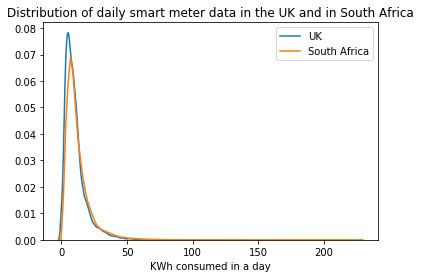

In [208]:
sns.distplot(uk_days.iloc[:,0],hist = False, label = "UK")
sns.distplot(sa_days.iloc[:,1], hist = False, label = "South Africa")
plt.title("Distribution of daily smart meter data in the UK and in South Africa")
plt.xlabel("KWh consumed in a day")
plt.savefig("Plots/Distributions daily.png")
plt.show()


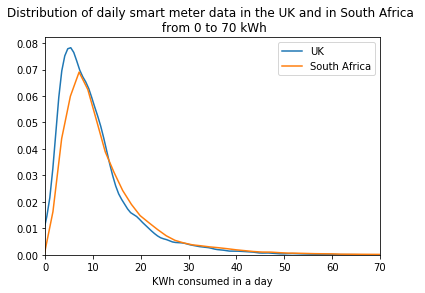

In [209]:
sns.distplot(uk_days.iloc[:,0],hist = False, label = "UK")
sns.distplot(sa_days.iloc[:,1], hist = False, label = "South Africa")
plt.title("Distribution of daily smart meter data in the UK and in South Africa \n from 0 to 70 kWh")
plt.xlabel("KWh consumed in a day")
plt.xlim(0,70)
plt.savefig("Plots/Distributions daily - from 0 to 70.png")
plt.show()


These are the main stastistical values for each datasets

In [210]:
mean_day_sa = sa_days.iloc[:,1].mean()
mean_day_uk = uk_days.iloc[:,0].mean()
sd_day_sa = sa_days.iloc[:,1].std()
sd_day_uk = uk_days.iloc[:,0].std()
min_day_sa = min(sa_days.iloc[:,1])
min_day_uk = min(uk_days.iloc[:,0])
max_day_sa = max(sa_days.iloc[:,1])
max_day_uk = max(uk_days.iloc[:,0])

We organise the datasets so that we can merge them 

In [13]:
sa_days.rename(columns={'ProfileID':'ID'}, index={"Datefield":"DateTime"}, inplace=True)

sa_days.head()


,ID,KWh,Countries
DateTime,,,
2013-01-01,12019685,6.057333,South Africa
2013-01-02,12019685,7.546000,South Africa
2013-01-03,12019685,7.612000,South Africa
2013-01-04,12019685,11.403333,South Africa
2013-01-05,12019685,10.384000,South Africa


In [14]:
cols = ["ID", "KWh", "Countries"]

uk_days.rename(columns={'LCLid':'ID'}, inplace=True)
uk_days = uk_days[cols]

uk_days.head()

,ID,KWh,Countries
DateTime,,,
2013-01-01,MAC000002,10.800,United Kingdom
2013-01-02,MAC000002,13.300,United Kingdom
2013-01-03,MAC000002,10.074,United Kingdom
2013-01-04,MAC000002,9.857,United Kingdom
2013-01-05,MAC000002,11.171,United Kingdom


In [15]:
days = sa_days.append(uk_days)
days.head()

,ID,KWh,Countries
DateTime,,,
2013-01-01,12019685,6.057333,South Africa
2013-01-02,12019685,7.546000,South Africa
2013-01-03,12019685,7.612000,South Africa
2013-01-04,12019685,11.403333,South Africa
2013-01-05,12019685,10.384000,South Africa


We then plot boxplots for both datasets 

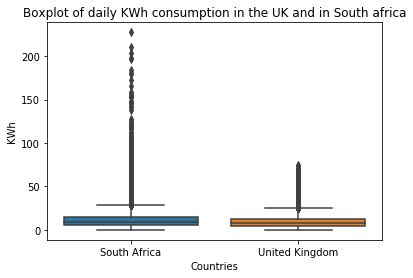

In [214]:
sns.boxplot(x="Countries", y="KWh", data=days)
plt.title("Boxplot of daily KWh consumption in the UK and in South africa")
plt.savefig("Plots/BoxplotDaily.png")
plt.show()


We zoom in to get better insight

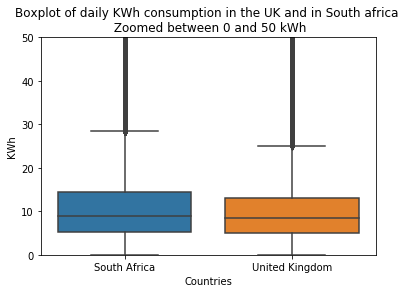

In [215]:
sns.boxplot(x="Countries", y="KWh", data=days)
plt.ylim(0,50)
plt.title("Boxplot of daily KWh consumption in the UK and in South africa \n Zoomed between 0 and 50 kWh")
plt.savefig("Plots/BoxplotDailyZoomed.png")
plt.show()


### Mean winter and summer weeks

We filter the summer and winter months, and add weekday and hour columns

In [16]:
winter = [1,2,12]
summer = [6,7,8]

sa_plot.head()

,ProfileID,DateTime,KWh,Countries
DateTime,,,,
2013-01-01 00:00:00,12019685,2013-01-01 00:00:00,0.176,South Africa
2013-01-01 01:00:00,12019685,2013-01-01 01:00:00,0.176,South Africa
2013-01-01 02:00:00,12019685,2013-01-01 02:00:00,0.176,South Africa
2013-01-01 03:00:00,12019685,2013-01-01 03:00:00,0.176,South Africa
2013-01-01 04:00:00,12019685,2013-01-01 04:00:00,0.176,South Africa


In [17]:
sa_year = sa_plot
sa_year.index= pd.DatetimeIndex(sa_plot["DateTime"])
sa_year = sa_year.drop(["DateTime"], axis = 1)
sa_year["Month"] = sa_year.index.month

sa_year["Weekday"] = sa_year.index.weekday
sa_year["Hour"] = sa_year.index.hour
sa_winter = sa_year[sa_year["Month"].isin(winter)]
sa_summer = sa_year[sa_year["Month"].isin(summer)]
sa_summer.head()


,ProfileID,KWh,Countries,Month,Weekday,Hour
DateTime,,,,,,
2013-06-01 00:00:00,12019685,0.044000,South Africa,6,5,0
2013-06-01 01:00:00,12019685,0.047667,South Africa,6,5,1
2013-06-01 02:00:00,12019685,0.051333,South Africa,6,5,2
2013-06-01 03:00:00,12019685,0.051333,South Africa,6,5,3
2013-06-01 04:00:00,12019685,0.095333,South Africa,6,5,4


In [18]:
uk_year = uk_plot
uk_year.index= pd.DatetimeIndex(uk_plot["DateTime"])
uk_year = uk_year.drop(["DateTime"], axis = 1)

uk_year["Month"] = uk_year.index.month
uk_year["Weekday"] = uk_year.index.weekday
uk_year["Hour"] = uk_year.index.hour

uk_winter = uk_year[uk_year["Month"].isin(winter)]
uk_summer = uk_year[uk_year["Month"].isin(summer)]


We group by weekday and then by hour and calculated the mean and standard deviation for all of the 168 hours in a week, for summer and winter, in the UK and South Africa


In [19]:
sa_summer1 = sa_summer.groupby(["Weekday","Hour"]).apply(lambda x: x["KWh"].mean()).to_frame()
sa_summer_std = sa_summer.groupby(["Weekday","Hour"]).apply(lambda x: x["KWh"].std())
sa_summer_med = sa_summer.groupby(["Weekday","Hour"]).apply(lambda x: x["KWh"].median())

sa_summer1["Median"] = sa_summer_med
sa_summer1["Std"] = sa_summer_std
sa_summer1.rename(columns = {0:"Mean"}, inplace = True)
sa_summer1["Country"] = "South Africa"
sa_summer1["Hours"] = list(range(1,169))


sa_winter1 = sa_winter.groupby(["Weekday","Hour"]).apply(lambda x: x["KWh"].mean()).to_frame()
sa_winter_std = sa_winter.groupby(["Weekday","Hour"]).apply(lambda x: x["KWh"].std())
sa_winter_med = sa_winter.groupby(["Weekday","Hour"]).apply(lambda x: x["KWh"].median())

sa_winter1["Median"] = sa_winter_med
sa_winter1["Std"] = sa_winter_std
sa_winter1.rename(columns = {0:"Mean"}, inplace = True)
sa_winter1["Country"] = "South Africa"
sa_winter1["Hours"] = list(range(1,169))

sa_summer1.head()


Mean    Median       Std       Country  Hours
Weekday Hour                                                   
0       0     0.235914  0.143000  0.335381  South Africa      1
        1     0.223398  0.135667  0.327187  South Africa      2
        2     0.218182  0.132000  0.315637  South Africa      3
        3     0.273411  0.143000  0.418008  South Africa      4
        4     0.377519  0.176000  0.546392  South Africa      5

In [20]:
uk_summer1 = uk_summer.groupby(["Weekday","Hour"]).apply(lambda x: x["KWh"].mean()).to_frame()
uk_summer_std = uk_summer.groupby(["Weekday","Hour"]).apply(lambda x: x["KWh"].std())
uk_summer_med = uk_summer.groupby(["Weekday","Hour"]).apply(lambda x: x["KWh"].median())

uk_summer1["Median"] = uk_summer_med
uk_summer1["Std"] = uk_summer_std
uk_summer1.rename(columns = {0:"Mean"}, inplace = True)
uk_summer1["Country"] = "UK"
uk_summer1["Hours"] = list(range(1,169))

uk_winter1 = uk_winter.groupby(["Weekday","Hour"]).apply(lambda x: x["KWh"].mean()).to_frame()
uk_winter_std = uk_winter.groupby(["Weekday","Hour"]).apply(lambda x: x["KWh"].std())
uk_winter_med = uk_winter.groupby(["Weekday","Hour"]).apply(lambda x: x["KWh"].median())

uk_winter1["Median"] = uk_winter_med
uk_winter1["Std"] = uk_winter_std
uk_winter1.rename(columns = {0:"Mean"}, inplace = True)
uk_winter1["Country"] = "UK"
uk_winter1["Hours"] = list(range(1,169))


uk_winter1.tail()



Mean  Median       Std Country  Hours
Weekday Hour                                           
6       19    0.822330   0.560  0.807162      UK    164
        20    0.774859   0.548  0.724274      UK    165
        21    0.706406   0.519  0.643200      UK    166
        22    0.636528   0.462  0.610192      UK    167
        23    0.526106   0.363  0.583137      UK    168

As South Africa and the Uk are in different hemisphere, seasons are inverted. We merge UK winter and South African summer and vice versa

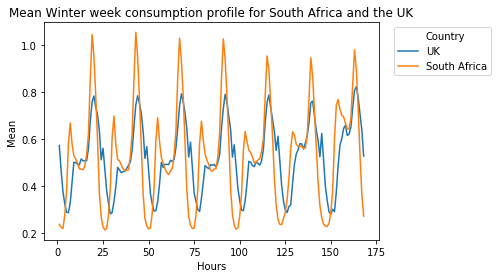

In [22]:
winter = uk_winter1.append(sa_summer1)
sns.lineplot(x = "Hours", y = "Mean", hue = "Country", data =winter)
plt.legend(bbox_to_anchor=(1.35, 1),loc='upper right')
plt.title("Mean Winter week consumption profile for South Africa and the UK")
plt.savefig("Plots/MeanWinterCurve.png")

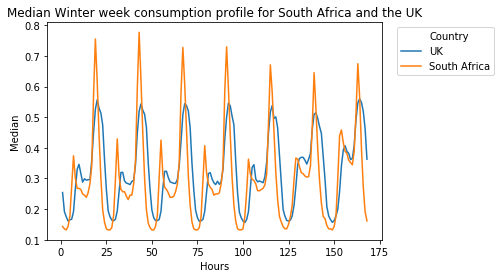

In [23]:
sns.lineplot(x = "Hours", y = "Median", hue = "Country", data =winter)
plt.legend(bbox_to_anchor=(1.35, 1),loc='upper right')
plt.title("Median Winter week consumption profile for South Africa and the UK")
plt.savefig("Plots/MedianWinterCurve.png")

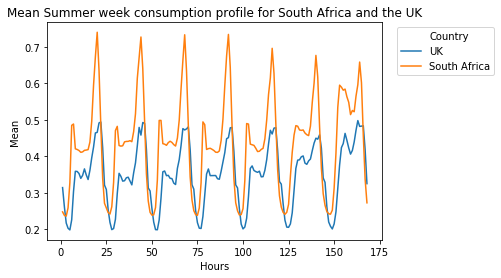

In [24]:
summer = uk_summer1.append(sa_winter1)

sns.lineplot(x = "Hours", y = "Mean", hue = "Country", data =summer)
plt.legend(bbox_to_anchor=(1.35, 1),loc='upper right')
plt.title("Mean Summer week consumption profile for South Africa and the UK")
plt.savefig("Plots/MeanSummerCurve.png")

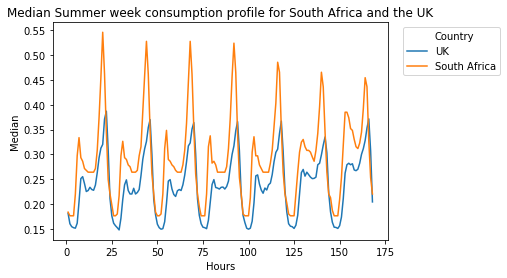

In [25]:
sns.lineplot(x = "Hours", y = "Median", hue = "Country", data =summer)
plt.legend(bbox_to_anchor=(1.35, 1),loc='upper right')
plt.title("Median Summer week consumption profile for South Africa and the UK")
plt.savefig("Plots/MedianSummerCurve.png")

We plot the ratio summer/winter for both countries to see of they compare

In [225]:
sa_sow = sa_summer1

sa_sow.head()
sa_sow["MeanRatio"] = sa_winter1["Mean"]/sa_summer1["Mean"]

uk_sow = uk_summer1


uk_sow["MeanRatio"] = uk_summer1["Mean"]/uk_winter1["Mean"]
uk_sow.head()

Mean       Std Country  Hours  MeanRatio
Weekday Hour                                              
0       0     0.314093  0.462096      UK      1   0.549945
        1     0.261061  0.375423      UK      2   0.560853
        2     0.216972  0.274504      UK      3   0.577623
        3     0.202763  0.203969      UK      4   0.626444
        4     0.198134  0.183224      UK      5   0.690820

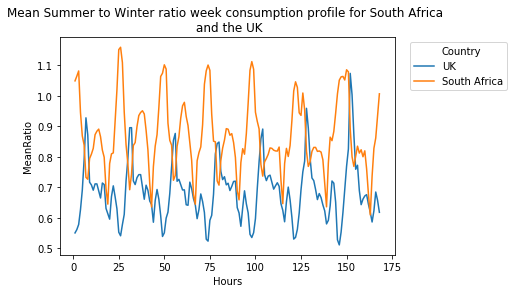

In [226]:
sow = uk_sow.append(sa_sow)

sns.lineplot(x = "Hours", y = "MeanRatio", hue = "Country", data =sow)
plt.legend(bbox_to_anchor=(1.35, 1),loc='upper right')
plt.title("Mean Summer to Winter ratio week consumption profile for South Africa \n and the UK")
plt.savefig("Plots/MeanRatioCurve.png")